In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

C:\Users\Client\AppData\Local\Temp\ipykernel_18448\1573001289.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_18448\1573001289.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  clinical_df.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_18448\1573001289.py:37: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  protein_t.columns
C:\Users\Client\AppData\Local\Temp\ipykernel_18448\1573001289.py:37: FutureWarning: The default value of regex will change 

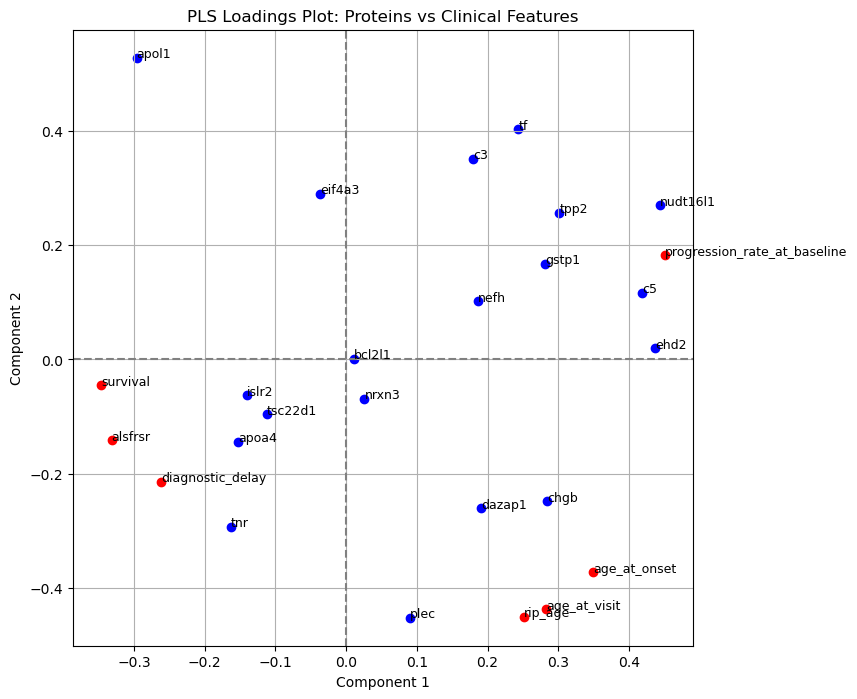

In [2]:


# === Define proteins and clinical features ===
significant_proteins = [
    "tnr", "apol1", "nudt16l1", "islr2", "gstp1", "nrxn3", "apoa4", "dazap1",
    "ehd2", "c5", "tpp2", "c3", "tsc22d1", "plec", "tf", "bcl2l1", "eif4a3",
    "chgb", "nefh"
]

clinical_cols = [
    "alsfrsr", "age_at_onset", "age_at_visit", "diagnostic_delay",
    "progression_rate_at_baseline", "rip_age", "survival"
]

# === Load clinical data ===
clinical_df = pd.read_excel(
    r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Corelation data.xlsx",
    sheet_name="COX data"
)
clinical_df.columns = (
    clinical_df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)

# === Load protein data ===
protein_df = pd.read_excel(
    r"C:\Users\Client\OneDrive - Queen Mary, University of London\PhD Shared folder\SomaScan Results\Soma Mann results no mistake.xlsx",
    sheet_name="Sheet3",
    header=0
)

protein_t = protein_df.set_index("Group ID").T
protein_t.columns = (
    protein_t.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("-", "_")
    .str.replace("(", "")
    .str.replace(")", "")
)
protein_t = protein_t.reset_index().rename(columns={"index": "group_id"})

# === Merge datasets ===
protein_subset = protein_t[["group_id"] + significant_proteins].dropna()
clinical_subset = clinical_df[["group_id"] + clinical_cols].dropna()
merged_df = pd.merge(protein_subset, clinical_subset, on="group_id").dropna()

# === Scale data ===
X = merged_df[significant_proteins].values
Y = merged_df[clinical_cols].values

X_scaled = StandardScaler().fit_transform(X)
Y_scaled = StandardScaler().fit_transform(Y)

# === Run PLS Regression ===
pls = PLSRegression(n_components=2)  # choose number of latent components
pls.fit(X_scaled, Y_scaled)

# === Get results ===
X_scores = pls.x_scores_
Y_scores = pls.y_scores_
X_loadings = pls.x_loadings_
Y_loadings = pls.y_loadings_

# === Plot correlation circle (loadings) ===
plt.figure(figsize=(8, 8))
for i, protein in enumerate(significant_proteins):
    plt.scatter(X_loadings[i, 0], X_loadings[i, 1], color="blue")
    plt.text(X_loadings[i, 0], X_loadings[i, 1], protein, fontsize=9)

for j, feature in enumerate(clinical_cols):
    plt.scatter(Y_loadings[j, 0], Y_loadings[j, 1], color="red")
    plt.text(Y_loadings[j, 0], Y_loadings[j, 1], feature, fontsize=9)

plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")
plt.title("PLS Loadings Plot: Proteins vs Clinical Features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

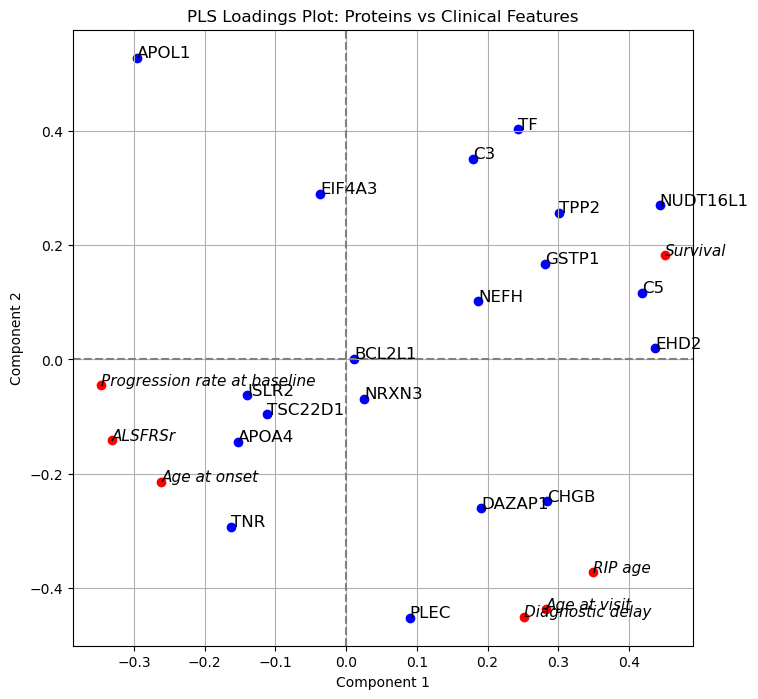

In [3]:
# === Prepare labels ===
# Convert protein names to uppercase
protein_labels = [p.upper() for p in significant_proteins]

# Define clinical feature labels with desired formatting
clinical_labels = [
    "ALSFRSr",
    "RIP age",
    "Age at visit",
    "Age at onset",
    "Survival",
    "Diagnostic delay",
    "Progression rate at baseline"
]

# === Plot correlation circle (loadings) ===
plt.figure(figsize=(8, 8))
for i, protein in enumerate(protein_labels):
    plt.scatter(X_loadings[i, 0], X_loadings[i, 1], color="blue")
    plt.text(X_loadings[i, 0], X_loadings[i, 1], protein,
             fontsize=12, )  # largert

for j, feature in enumerate(clinical_labels):
    plt.scatter(Y_loadings[j, 0], Y_loadings[j, 1], color="red")
    plt.text(Y_loadings[j, 0], Y_loadings[j, 1], feature,
             fontsize=11, fontstyle='italic')  # italic for distinction

plt.axhline(0, color="grey", linestyle="--")
plt.axvline(0, color="grey", linestyle="--")
plt.title("PLS Loadings Plot: Proteins vs Clinical Features")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.grid(True)
plt.show()

